In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn import metrics

In [52]:
data = pd.read_csv('Sales_add.csv')
data

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


There is 22 rows and 5 coloumns. This dataset has Month, Region, Manager, 
Sales before digital add, Sales after digital add

In [54]:
data.isna().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

We can see that , there is no missing values present in our dataset,  so we can move to data visualization

# Q.The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

*  H0 : Null Hypothesis :- There is no increase in sales after stepping into digital marketing
*  H1 : Alternate Hypothesis : - There is a increase in sales after stepping into digital marketing

In [62]:
from scipy.stats import ttest_ind

In [63]:
import pandas as pd
from scipy import stats

In [64]:
data[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].describe()


,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [68]:
ttest,pval = stats.ttest_rel(data['Sales_before_digital_add(in $)'], data['Sales_After_digital_add(in $)'])
print('P Value is :', pval)
if pval<0.05:
    print("reject null hypothesis: There is a increase in sale after stepping into digital marketing")
else:
    print("accept null hypothesis : There is no increase in sale after stepping into digital marketing")

P Value is : 6.336667004575778e-11
reject null hypothesis: There is a increase in sale after stepping into digital marketing


In [69]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


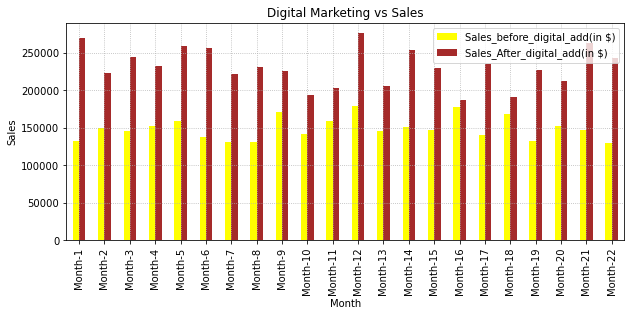

In [83]:
d1 = data.plot(x='Month',y=['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)'],kind='bar',figsize=(10, 4),color={'Sales_before_digital_add(in $)':'yellow','Sales_After_digital_add(in $)':'brown'})
d1=plt.grid(linestyle ='dotted')
plt.title("Digital Marketing vs Sales")
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

* Clearly digital marketing has tremendous effect on Sales

# Q. The company needs to check whether there is any dependency between the features “Region” and “Manager”.

*  H0 : Null Hypothesis :- There is no relation between Region and Manager
*  H1 : Alternate Hypothesis : - There is a relation between Region and Manager

In [19]:
df=pd.crosstab(data["Region"],data["Manager"])
df


Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [8]:
#Observed Values
Observed_Values = df.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[4 3 3]
 [4 1 2]
 [1 3 1]]


In [11]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols
b=stats.chi2_contingency(df)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[4.09090909 3.18181818 2.72727273]
 [2.86363636 2.22727273 1.90909091]
 [2.04545455 1.59090909 1.36363636]]


In [12]:
no_of_rows=len(df.iloc[0:2,0])
no_of_columns=len(df.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [13]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 2.921995464852608


In [14]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [15]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)

p-value: 0.08737974495299139


In [16]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 2.921995464852608
critical_value: 3.841458820694124
p-value: 0.08737974495299139


In [20]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between Region and Manager")
else:
    print("Retain H0,There is no relationship between Region and Manager")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between Region and Manager")
else:
    print("Retain H0,There is no relationship between Region and Manager")

Retain H0,There is no relationship between Region and Manager
Retain H0,There is no relationship between Region and Manager


* We can Conclude that there is no relationship between Region and Manager